## Financial Inclusion in Africa
* The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.


### Import the libraries.


In [105]:
import numpy as np # math manipulation
import pandas as pd #dataframe manipulations
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization

#sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [106]:
train=pd.read_csv("/kaggle/input/financial-inclusion/Train.csv")
var_df=pd.read_csv("/kaggle/input/financial-inclusion/VariableDefinitions.csv")
test=pd.read_csv("/kaggle/input/financial-inclusion/Test.csv")
test['new_id'] = test['uniqueid'] + ' x ' +test['country']

In [107]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [108]:
# var_df

In [109]:
train.describe().T

#Look at the data,I dentify any outliers and check if it is a data entry mistake
#
#drop the rows with outliers if less than 5% and fill the rows with the mean or median distribution

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


In [110]:
train.shape
#If total number doesnt match info rows their are missing values

(23524, 13)

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [112]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

# EDA

### Numerical EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


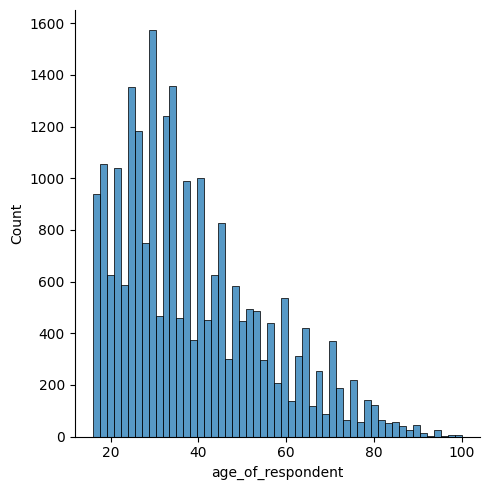

In [113]:
sns.displot(train["age_of_respondent"])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


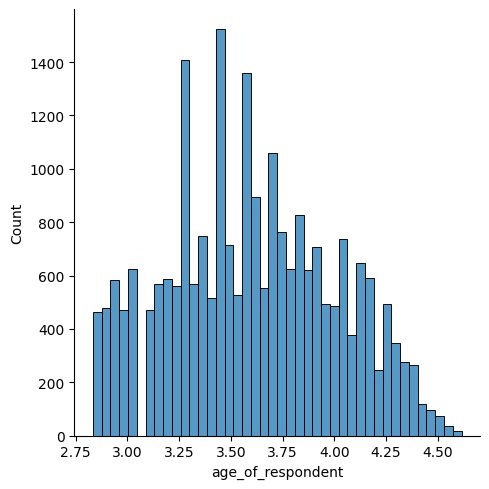

In [114]:
sns.displot(np.log1p(train["age_of_respondent"]))

### Categorical columns
Bank account

<Axes: xlabel='bank_account', ylabel='count'>

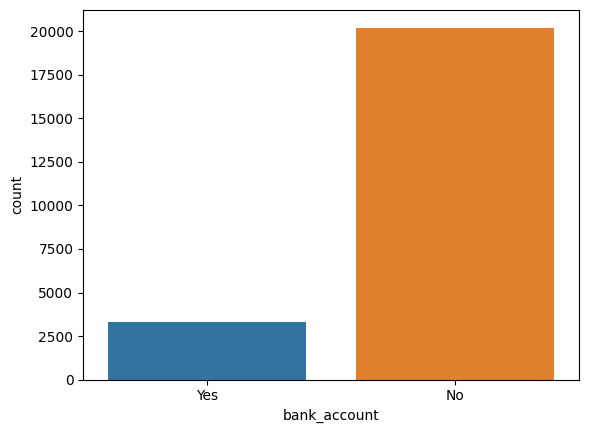

In [115]:
sns.countplot(train, x= "bank_account")

### Feature engineering

In [116]:
le = LabelEncoder()
for df in [train, test]:
    df['age_of_respondent'] = np.log1p(df['age_of_respondent'])
    for col in ['country', 'location_type','cellphone_access', 
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']:
        df[col] = le.fit_transform(df[col])

In [117]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [118]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,Yes,0,1,3,3.218876,0,5,2,3,9
1,0,2018,uniqueid_2,No,0,0,5,4.262680,0,1,4,0,4
2,0,2018,uniqueid_3,Yes,1,1,5,3.295837,1,3,3,5,9
3,0,2018,uniqueid_4,No,0,1,5,3.555348,0,1,2,2,3
4,0,2018,uniqueid_5,No,1,0,8,3.295837,1,0,3,2,5


### Training and evaluation

In [119]:
## X-Independent_features 
## Y - dependent features
x_features=['country', 'year', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']
y_target="bank_account"

In [120]:
train['stratify'] = train["bank_account"] + '-'+ train['country'].astype('str')
train['bank_account'] = le.fit_transform(train['bank_account'])
x = train[x_features]
y=train[y_target]

x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size = 0.2, stratify=train["stratify"], random_state = 42)

In [121]:
model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)
predictions = model.predict(x_valid)
print("mean absolute error:" ,mean_absolute_error(predictions, y_valid))

mean absolute error: 0.13156216790648245


In [122]:
test_preds = model.predict(test[x_features])
test['preds'] = test_preds



In [124]:

sub=test[['new_id','preds']]
sub.to_csv('baseline.csv', index=False)

In [125]:
sub.head()

,new_id,preds
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
